<a href="https://colab.research.google.com/github/Waqasahmed100/PGD_CSE/blob/main/AHMED_Muhammad_Waqas_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Summary Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


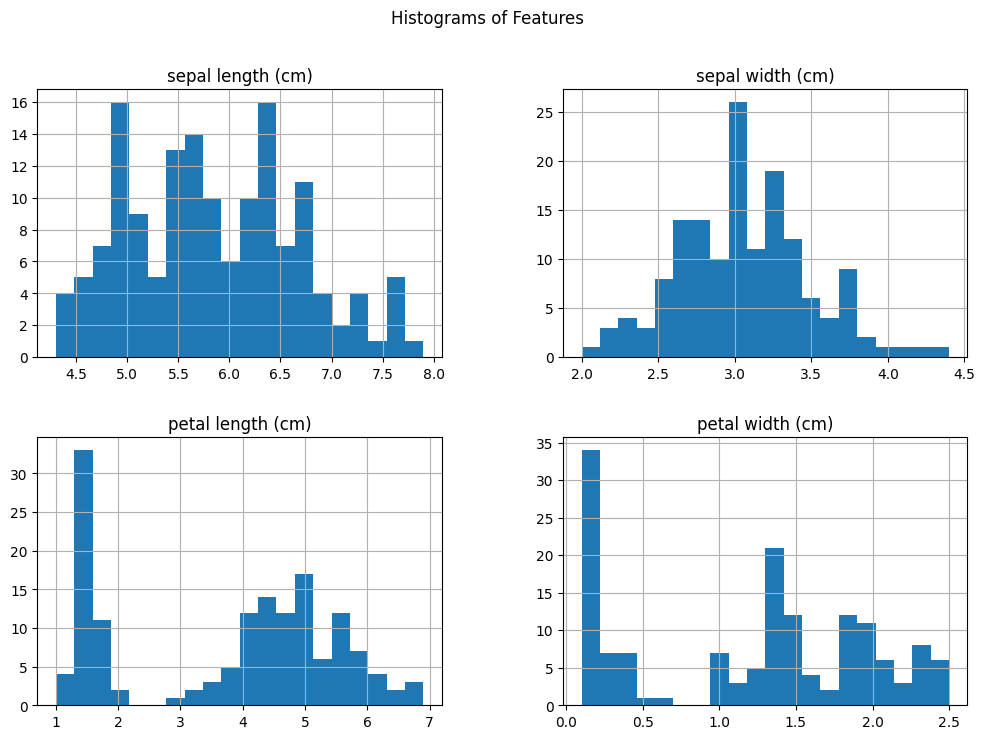

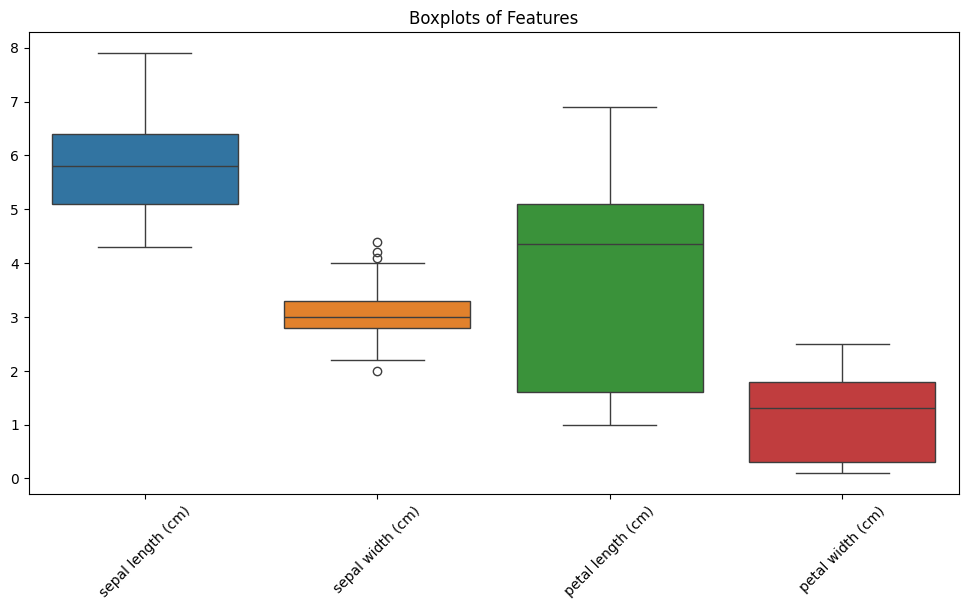

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'df' is your DataFrame
print("Summary Statistics:")
print(df.describe())

# Plotting histograms for each feature
df.hist(bins=20, figsize=(12, 8))
plt.suptitle("Histograms of Features")
plt.show()

# Plotting boxplots for each feature to visualize range and outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplots of Features")
plt.xticks(rotation=45)
plt.show()


In [12]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
data = df[["petal length (cm)", "petal width (cm)"]]
print(data)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

     petal length (cm)  petal width (cm)
0                  1.4               0.2
1                  1.4               0.2
2                  1.3               0.2
3                  1.5               0.2
4                  1.4               0.2
..                 ...               ...
145                5.2               2.3
146                5.0               1.9
147                5.2               2.0
148                5.4               2.3
149                5.1               1.8

[150 rows x 2 columns]


# 3. Determine the optimal number of clusters using the Elbow Method

In [13]:


wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init="k-means++", max_iter=300, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)


# Plotting the Elbow curve

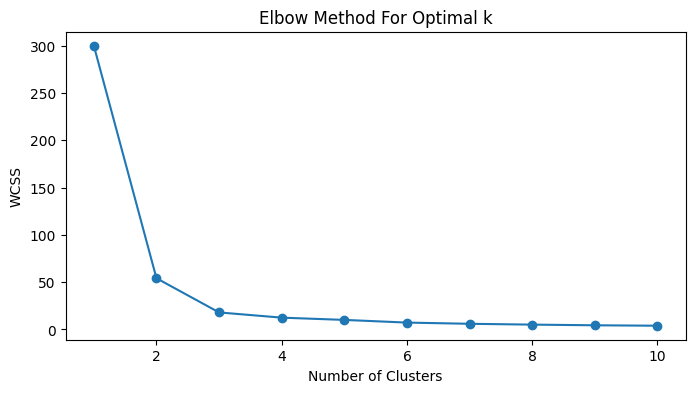

In [14]:

plt.figure(figsize=(8, 4))
plt.plot(K_range, wcss, marker="o")
plt.title("Elbow Method For Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

## Elbow Point is k=3

Silhouette Scores for different k:
k = 2: 0.743
k = 3: 0.674
k = 4: 0.586
k = 5: 0.567
k = 6: 0.582
k = 7: 0.573
k = 8: 0.590
k = 9: 0.462
k = 10: 0.445


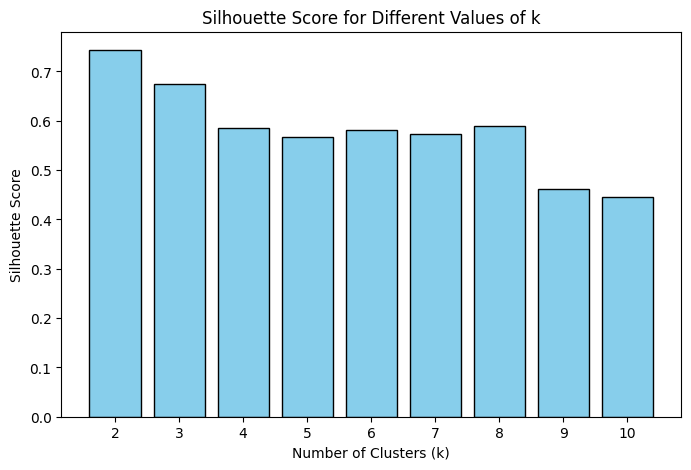

In [16]:
silhouette_scores = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", max_iter=300, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores[k] = score

print("Silhouette Scores for different k:")
for k, score in silhouette_scores.items():
    print(f"k = {k}: {score:.3f}")

k_values = list(silhouette_scores.keys())
score_values = list(silhouette_scores.values())

plt.figure(figsize=(8, 5))
plt.bar(k_values, score_values, color='skyblue', edgecolor='black')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.xticks(k_values)  # Ensure x-axis has correct labels
plt.show()

# Silhouette Score is highest at K = 2

## Optimal K

In [17]:
optimal_k = 2

# Using k-means++ initialization

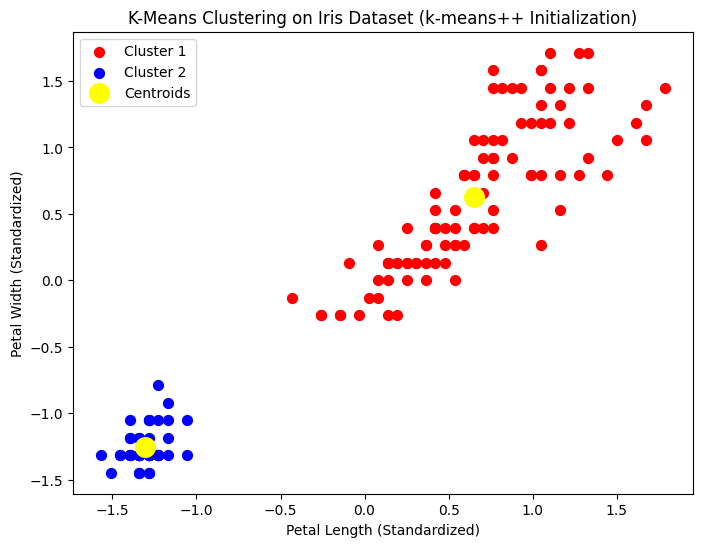

In [19]:
kmeans_pp = KMeans(n_clusters=optimal_k, init="k-means++", max_iter=300, random_state=42)
clusters_pp = kmeans_pp.fit_predict(data_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(data_scaled[clusters_pp == 0, 0], data_scaled[clusters_pp == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(data_scaled[clusters_pp == 1, 0], data_scaled[clusters_pp == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(kmeans_pp.cluster_centers_[:, 0], kmeans_pp.cluster_centers_[:, 1], s=200, c='yellow', label='Centroids')
plt.title("K-Means Clustering on Iris Dataset (k-means++ Initialization)")
plt.xlabel("Petal Length (Standardized)")
plt.ylabel("Petal Width (Standardized)")
plt.legend()
plt.show()

# Using random initialization

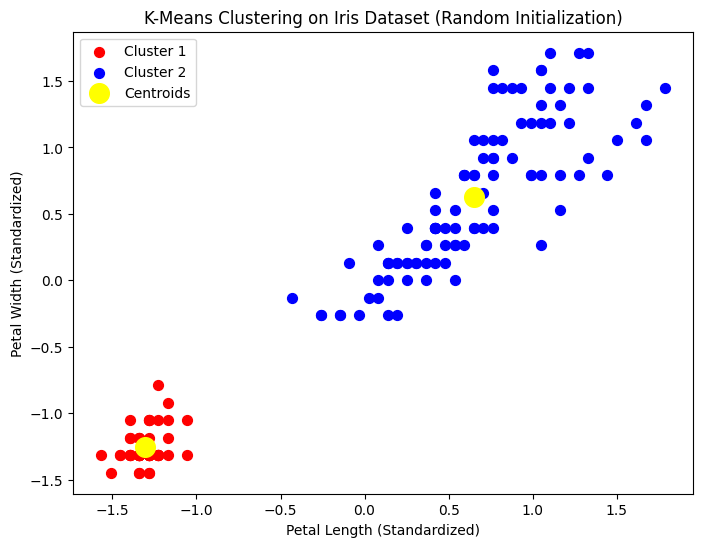

In [20]:
kmeans_random = KMeans(n_clusters=optimal_k, init="random", max_iter=300, random_state=42)
clusters_random = kmeans_random.fit_predict(data_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(data_scaled[clusters_random == 0, 0], data_scaled[clusters_random == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(data_scaled[clusters_random == 1, 0], data_scaled[clusters_random == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(kmeans_random.cluster_centers_[:, 0], kmeans_random.cluster_centers_[:, 1], s=200, c='yellow', label='Centroids')
plt.title("K-Means Clustering on Iris Dataset (Random Initialization)")
plt.xlabel("Petal Length (Standardized)")
plt.ylabel("Petal Width (Standardized)")
plt.legend()
plt.show()


# At K=2 was used, the algorithm naturally separates the smallest-petal variety (Cluster 1) from all the larger-petal flowers (Cluster 2).


